# Librerias y Lectura de Archivos

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

In [150]:
file_path = "../data/cliente_bi.csv"  # Sustituye con la ruta real de tu archivo
df = pd.read_csv(file_path)

Nos hemos importado la tabla resultante de la **consulta cliente_bi.sql**,que nos da una informaciós más detallada sobre cada cliente.En ella tenemos dos tipos de datos
- **Idenficativos de cada cliente**(Edad,Género,Status..) 
- **Métricas calcualadas para el análisis**(CLV,Coste medio Cliente,PVP..)

In [151]:
df

,Customer_ID,Edad,RENTA_MEDIA_ESTIMADA,GENERO,Fecha_nacimiento,STATUS_SOCIAL,CODIGO_POSTAL,provincia,poblacion,lat,...,Compra_Tienda_Unica,Contrato_Seguro_Bateria,Coste_Medio_Cliente,Margen_Bruto_Medio,Margen_eur_Medio,Rentabilidad_Relativa,Dias_Medios_Desde_Ultima_Revision,churn_medio_estimado,retencion,CLV_5_anos
0,1,47,25641,M,11/01/1977,H,CP8470,Barcelona,Campins,2.463162,...,1,0,3265.320068,6131.069824,2865.750000,0.877632,0,0.272211,0.727789,5210.588655
1,7,36,0,F,09/01/1988,NaN,CP47009,Valladolid,Valladolid,-4.723349,...,1,0,2329.600098,4254.600098,1925.000000,0.826322,0,1.000000,0.000000,0.000000
2,10,39,0,M,09/01/1985,NaN,CP3130,Alicante/Alacant,Santa Pola,-0.555281,...,1,0,1890.599976,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117
3,11,53,0,M,13/01/1971,NaN,CP8711,Barcelona,Òdena,1.638468,...,1,0,1890.599976,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117
4,12,47,27287,M,11/01/1977,G,CP17006,Girona,Girona,2.824119,...,1,0,1859.479980,3543.679932,1684.199951,0.905737,960,0.549063,0.450937,1211.345223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44048,99995,38,0,F,09/01/1986,NaN,CP8027,Barcelona,Barcelona,2.176349,...,1,0,6860.250000,9373.139648,2512.889893,0.366297,0,0.441196,0.558804,2641.998302
44049,99996,26,25909,F,06/01/1998,H,CP8140,Barcelona,Caldes de Montbui,2.164881,...,0,0,6698.509766,7687.030273,988.520020,0.147573,591,0.213327,0.786673,2156.374108
44050,99998,34,25191,M,08/01/1990,H,CP12580,Castellón/Castelló,Benicarló,0.423963,...,0,0,4265.944824,5134.584961,868.640015,0.203622,283,0.190247,0.809753,2033.052134
44051,99999,28,28967,F,07/01/1996,U,CP17152,Girona,Sant Martí de Llémena,2.646503,...,1,0,3331.919922,6302.669922,2970.750000,0.891603,998,0.817440,0.182560,611.356909


# PCA

El objetivo de este análisis es aplicar técnicas de reducción de dimensionalidad mediante **PCA** para simplificar la representación de clientes y posteriomente dividirlos en clusters,mediante **K-Means**

## Tratamiento Variables

De todas la columnas que teníamos en la tabla bi_cliente, nos hemos quedado unicamente con una serie de variables numéricas para realizar el PCA.

In [152]:
columnas_pca = [
    "Edad_Media_Coche",
    "RENTA_MEDIA_ESTIMADA",
    "Total_Compras",
    "PVP_Medio",
    "Dias_Desde_Ultima_Compra",
    "Total_Revisiones",
    "Coste_Medio_Cliente",
    "CLV_5_anos",
    "Margen_eur_Medio",
    "Km_Medio_por_Revision" 
]


**Eliminación Nulos**

In [153]:
df_pca = df[columnas_pca].dropna()

**Estandarización**

El escalado de las variables es fundamental antes de realizar un PCA  porque las variables que tienen una magnitud mucho mayor (por ejemplo, `PVP_Total`) pueden dominar el análisis, haciendo que el PCA refleje sobre todo esa variable y no capte bien la información de otras variables con menor rango (como `Edad` o `Total_Compras`).

Para evitarlo, utilizamos StandardScaler, que transforma las variables para que:

- Tengan media 0.
- Tengan desviación estándar 1.

In [154]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

**PCA 2 Componentes**

Se seleccionan los **dos primeros autovectores** (componentes principales) de la matriz de covarianza de los datos escalados, que mayor proporción de varinaza explican.

In [155]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_result

,PC1,PC2
0,-1.699808,-1.053234
1,0.382151,-0.366441
2,-2.356236,1.008408
3,-2.326118,1.022332
4,1.780268,0.571461
...,...,...
44048,-0.888707,-1.609734
44049,1.359731,-0.407791
44050,-0.364216,-0.944261
44051,2.162658,0.688747


**Varianza explicada**

La proporción de varianza explicada por cada componente se obtiene normalizando los autovalores, asociados a las anteriores componentes

In [156]:
pca.explained_variance_ratio_

array([0.26514787, 0.22761303])

- **Componente Principal 1 (PC1):** 26.51% de la varianza total.
- **Componente Principal 2 (PC2):** 22.76% de la varianza total.

los dos primeros componentes explican aproximadamente el 49.27% de la información contenida en los datos originales.


## Gráfico PCA

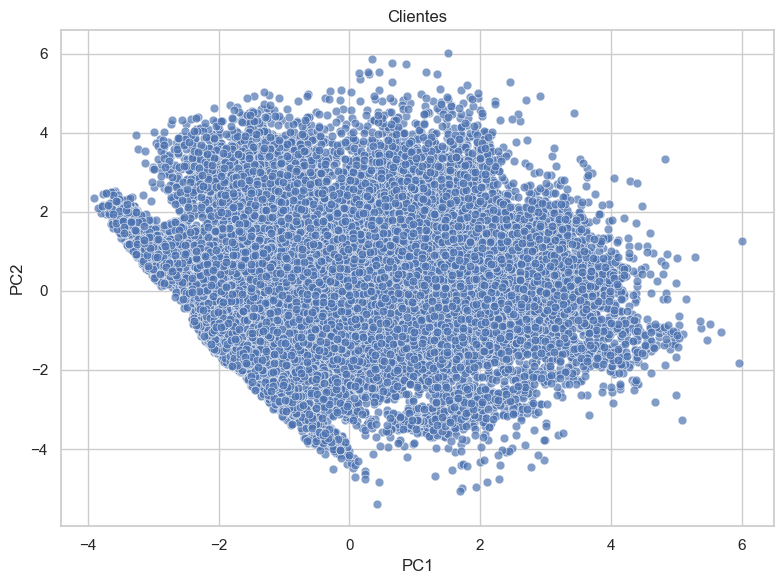

In [157]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca_result, s=40, alpha=0.7)

# Etiquetas
plt.title('Clientes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

# K-Means

## Número de Clusters

**Método Inercia**:
La inercia se define como la suma de las distancias al cuadrado de cada punto al centroide de su cluster. Un valor de inercia más bajo indica que los puntos están más cerca de su centroide, lo que sugiere que los clusters están bien definidos.

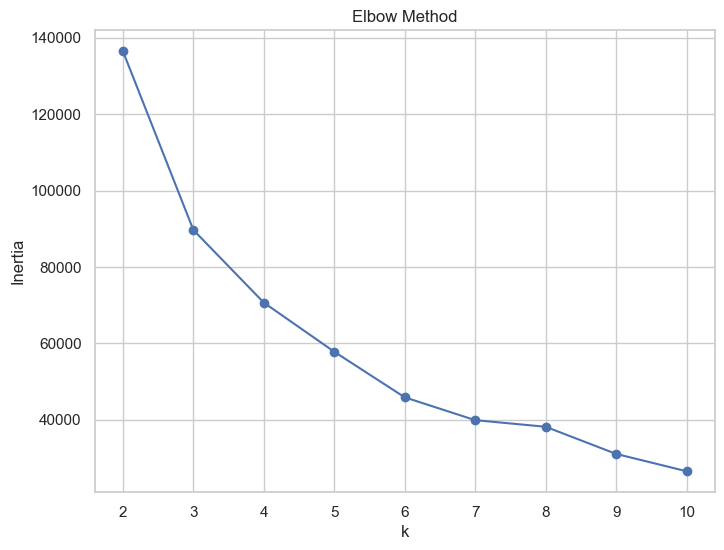

In [158]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')  # Línea con marcador en cada punto
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

**Método de la silueta**


Mide qué tan bien está agrupado cada punto en su propio cluster respecto a los demás clusters. Se calcula para cada punto \(i\) mediante la siguiente fórmula:

$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$

Donde:

- $a(i)$: Distancia media del punto $i$ respecto a los otros puntos del mismo cluster.
- $b(i)$: Distancia media del punto $i$ a los puntos del cluster más cercano al suyo.

**Interpretación:**

- Valores cercanos a **1** indican que el punto está bien agrupado en su cluster.
- Valores cercanos a **0** indican que el punto está en la frontera entre dos clusters.
- Valores negativos sugieren que el punto podría estar asignado en un cluster incorrecto.

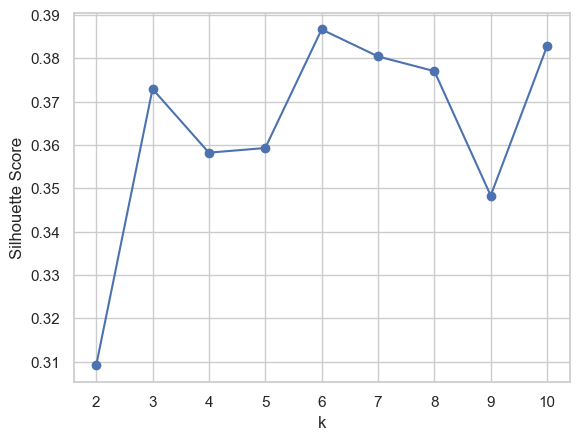

In [141]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    sil_scores.append(score)

# Graficar el método de la silueta
plt.plot(range(2, 11), sil_scores,marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

**¿Cuantos Clusters Seleccionamos?**

In [ ]:
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_6 = KMeans(n_clusters=6, random_state=42, n_init=10)

kmeans_5.fit(X_pca)
kmeans_6.fit(X_pca)


centroids_5 = kmeans_5.cluster_centers_
centroids_6 = kmeans_6.cluster_centers_
distances_5 = squareform(pdist(centroids_5))
distances_6 = squareform(pdist(centroids_6))

# Calcular el promedio de las distancias entre centroides para K=5 y K=6
avg_distance_5 = np.mean(distances_5[np.triu_indices_from(distances_5, k=1)])
avg_distance_6 = np.mean(distances_6[np.triu_indices_from(distances_6, k=1)])

In [160]:
df_avg_distances = pd.DataFrame({
    "Número de Clusters": [5, 6],
    "Promedio de Distancias": [avg_distance_5, avg_distance_6]
})
df_avg_distances

,Número de Clusters,Promedio de Distancias
0,5,3.063066
1,6,3.132665


**K=6 es la mejor opción** porque la **separación promedio entre los clusters es mayor**.

## Representación Clusters

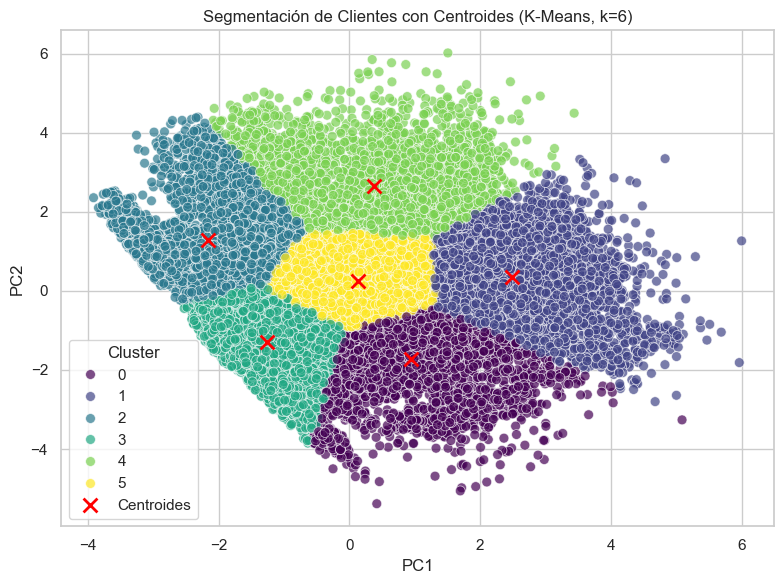

In [161]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df_pca_result['Cluster'] = kmeans.fit_predict(X_pca)

# Centroides en el espacio de los componentes principales
centroids = kmeans.cluster_centers_


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=df_pca_result, 
    palette='viridis', 
    s=50, 
    alpha=0.7
)


plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', marker='x', s=100, linewidths=2, label='Centroides')

plt.title('Segmentación de Clientes con Centroides (K-Means, k=6)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [162]:
df_pca['Cluster'] = df_pca_result['Cluster']
df_final = df.copy()
df_final = df_final.merge(df_pca_result[['PC1', 'PC2', 'Cluster']], left_index=True, right_index=True)

df_final

,Customer_ID,Edad,RENTA_MEDIA_ESTIMADA,GENERO,Fecha_nacimiento,STATUS_SOCIAL,CODIGO_POSTAL,provincia,poblacion,lat,...,Margen_Bruto_Medio,Margen_eur_Medio,Rentabilidad_Relativa,Dias_Medios_Desde_Ultima_Revision,churn_medio_estimado,retencion,CLV_5_anos,PC1,PC2,Cluster
0,1,47,25641,M,11/01/1977,H,CP8470,Barcelona,Campins,2.463162,...,6131.069824,2865.750000,0.877632,0,0.272211,0.727789,5210.588655,-1.699808,-1.053234,3
1,7,36,0,F,09/01/1988,NaN,CP47009,Valladolid,Valladolid,-4.723349,...,4254.600098,1925.000000,0.826322,0,1.000000,0.000000,0.000000,0.382151,-0.366441,5
2,10,39,0,M,09/01/1985,NaN,CP3130,Alicante/Alacant,Santa Pola,-0.555281,...,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117,-2.356236,1.008408,2
3,11,53,0,M,13/01/1971,NaN,CP8711,Barcelona,Òdena,1.638468,...,13041.900391,11151.299805,5.898286,0,0.383326,0.616674,14214.290117,-2.326118,1.022332,2
4,12,47,27287,M,11/01/1977,G,CP17006,Girona,Girona,2.824119,...,3543.679932,1684.199951,0.905737,960,0.549063,0.450937,1211.345223,1.780268,0.571461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44048,99995,38,0,F,09/01/1986,NaN,CP8027,Barcelona,Barcelona,2.176349,...,9373.139648,2512.889893,0.366297,0,0.441196,0.558804,2641.998302,-0.888707,-1.609734,3
44049,99996,26,25909,F,06/01/1998,H,CP8140,Barcelona,Caldes de Montbui,2.164881,...,7687.030273,988.520020,0.147573,591,0.213327,0.786673,2156.374108,1.359731,-0.407791,1
44050,99998,34,25191,M,08/01/1990,H,CP12580,Castellón/Castelló,Benicarló,0.423963,...,5134.584961,868.640015,0.203622,283,0.190247,0.809753,2033.052134,-0.364216,-0.944261,3
44051,99999,28,28967,F,07/01/1996,U,CP17152,Girona,Sant Martí de Llémena,2.646503,...,6302.669922,2970.750000,0.891603,998,0.817440,0.182560,611.356909,2.162658,0.688747,1


In [163]:
df_final.to_csv("df_final.csv", index=True)
print("Archivo guardado: df_finalcsv")

Archivo guardado: df_finalcsv


## Indices Para Los Clusters

In [164]:

df['Cluster'] = df_pca_result['Cluster']
media_global = df[columnas_pca].mean()

# Calcular la media de cada variable por cluster
media_cluster = df.groupby('Cluster')[columnas_pca].mean()


df_cluster_comp = media_cluster.divide(media_global)
df_cluster_comp

,Edad_Media_Coche,RENTA_MEDIA_ESTIMADA,Total_Compras,PVP_Medio,Dias_Desde_Ultima_Compra,Total_Revisiones,Coste_Medio_Cliente,CLV_5_anos,Margen_eur_Medio,Km_Medio_por_Revision
Cluster,,,,,,,,,,
0,0.960033,1.007925,0.914348,1.133498,0.998044,0.855251,1.822201,-0.577749,-0.293874,1.185841
1,2.002469,1.143973,0.946192,0.947917,1.951940,2.365245,1.234274,0.243502,0.336350,1.868739
2,0.399568,0.900581,0.961777,1.188683,0.489699,0.347231,0.478332,3.027048,2.638634,0.482331
3,0.305093,0.908787,0.956557,0.883720,0.393707,0.092071,1.075616,0.453190,0.598376,0.104186
4,1.596596,1.138917,1.036497,1.177033,1.523257,1.968619,0.497422,3.152906,2.556577,1.814123
5,1.148494,0.991205,1.137460,0.903244,1.048544,1.056457,0.798382,0.954867,1.041477,1.188847


In [165]:
df_cluster_comp.to_csv("df_cluster_comp.csv", index=True)
print("Archivo guardado: df_cluster_comp.csv")

Archivo guardado: df_cluster_comp.csv


## Análisis de Clusters de Clientes

Este análisis agrupa a los clientes en distintos segmentos según su comportamiento de compra, mantenimiento y rentabilidad. A continuación, se detallan las características principales de cada grupo:

**Cluster 0: Clientes con Alto Coste y Baja Rentabilidad**  
- Compran menos vehículos pero gastan más en cada compra.  
- Llevan menos sus coches al taller.  
- Su margen de rentabilidad es negativo, lo que indica que la empresa pierde dinero con ellos.  
- Su valor futuro (CLV) es bajo, lo que los hace poco rentables.  

Clientes que probablemente compran coches caros con grandes descuentos, afectando la rentabilidad de la empresa.  


**Cluster 1: Clientes de Alto Mantenimiento pero Baja Rentabilidad**  
- Poseen vehículos más antiguos y tienen alta renta.  
- Realizan muchas revisiones y mantenimientos.  
- Compran con frecuencia media, pero gastan menos por compra.  
- Tardan mucho en volver a comprar.  
- Su margen de rentabilidad es bajo.  

 Clientes fieles al servicio de mantenimiento, pero con baja rentabilidad para la empresa.  


**Cluster 2: Clientes Muy Rentables con Vehículos Nuevos**  
- Poseen vehículos nuevos y realizan pocas revisiones.  
- Gastan más por compra y su coste medio es bajo.  
- Tienen el margen de rentabilidad más alto de todos los grupos.  
- Su valor futuro (CLV) es el más alto.  

 Clientes ideales para la empresa, ya que generan alta rentabilidad con poco coste.  


**Cluster 3: Clientes con Vehículos Nuevos pero Poco Rentables**  
- Son los que tienen los vehículos más nuevos.  
- Apenas llevan sus coches a revisión.  
- Compran con frecuencia media, pero gastan menos en cada compra.  
- Su margen es bajo y su valor futuro también es bajo.  

 Clientes que compran coches nuevos, pero no generan beneficios significativos para la empresa.  


**Cluster 4: Clientes de Alto Valor y Frecuencia de Compra**  
- Tienen vehículos más antiguos y realizan muchas revisiones.  
- Compran con mayor frecuencia y gastan más por compra.  
- Su coste medio es bajo, lo que los hace eficientes.  
- Generan un margen muy alto y su valor futuro es excelente.  

 Clientes clave para la empresa, ya que generan altos ingresos y tienen hábitos de compra frecuentes.  


**Cluster 5: Clientes Promedio y Estables**  
- Tienen vehículos ligeramente más antiguos que la media.  
- Compran con frecuencia media y gastan un poco menos por compra.  
- Sus revisiones y coste medio son similares a la media.  
- Su rentabilidad y valor futuro son intermedios.  

 Clientes estables sin un gran impacto en la rentabilidad, pero tampoco generan pérdidas.  

